# Multi-Class Logistic Regression from Scratch
### Author : Saikrishna Javvadi

In [1]:
"""
Description : Importing the data and setting up the stage to create algorithm from scratch

"""
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#Reading the data file
df = pd.read_excel('C:\\Users\\javva\\Downloads\\beer.xlsx') 
#Rearranging the columns
df = df[['beer_id','calorific_value', 'nitrogen', 'turbidity', 'alcohol','sugars','bitterness','color',
                   'degree_of_fermentation','style']]
column_names = ['beer_id','calorific_value', 'nitrogen', 'turbidity', 'alcohol','sugars','bitterness','color',
                   'degree_of_fermentation','style'] 

#droping the beer_id column
df = df.drop(columns = ['beer_id'])
#Getting the data into numpy arrays i.e X_data(independent variables) and Y_data(dependent variable/label) 
X_data,Y_data = df.iloc[:,:-1].values, df.iloc[:,-1].values
#Unique classes that are to be  classified in the data
classes = np.unique(Y_data)
print(classes)
df.head()

['ale' 'lager' 'stout']


,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,color,degree_of_fermentation,style
0,41.721239,0.503276,2.628182,4.015385,16.73,10.452789,13.44,55.337143,ale
1,42.429204,0.525512,1.776364,4.092308,16.72,10.999526,12.24,58.380000,ale
2,45.880531,0.443233,2.628182,4.276923,16.68,13.456368,10.92,58.382857,ale
3,45.305310,0.471668,1.806364,4.126154,18.84,9.202737,10.92,58.525714,ale
4,38.977876,0.392846,2.272727,4.015385,16.77,9.457895,10.56,58.900000,ale


### Feature Scaling

In [2]:
def feature_scaling(X):
    """
    Description: Feature scaling using standarization
    Arguments:
    X -- A scalar or numpy array of any size.
    Return:
    X_scaled -- A numpy array of scaled data
    
    """
    mean = np.mean(X_data, axis=0) 
    sd = np.std(X_data, axis=0) 
    X_scaled= (X -  mean) / sd
    
    return X_scaled

### Sigmoid Function

In [3]:
def sigmoid(z):
    """
    Description: Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    
    """
    s = 1 / (1 + np.exp(-z))
    
    return s

### Cost Function

In [4]:
def cost_function(theta, X, Y,lambda_reg = 0.09):
    """
    Description:Implemention of the cost function with regularization

    Arguments:
    theta -- parameters, a numpy array of shape (3,8) i.e (3 - unique classes,8 - number of independent variables)
    X -- a numpy array of independent variables
    Y -- a numpy array of dependent variable(style) having true labels of data
    lambda_reg -- regularization constant lambda

    Return:
    cost -- negative log-likelihood cost for logistic regression
    A -- the probabilities for X with respect to theta
    
    """
    m = len(Y)
    A = sigmoid(np.dot(X,theta)) 
    regularization = (lambda_reg/(2 * m)) * np.sum(theta**2)
    cost=(- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) + regularization
    return cost,A   

### Gradient

In [5]:
def gradient(theta, X, Y,lambda_reg = 0.09):
    """
    Description:Implementation of gradient for regularized logistic regression 

    Arguments:
    theta -- parameters, a numpy array of shape (3,8) i.e (3 - unique classes,8 - number of independent variables)
    X -- a numpy array of independent variables
    Y -- a numpy array of dependent variable(style) having true labels of data
    lambda_reg -- regularization constant lambda

    Return:
    cost -- negative log-likelihood cost for logistic regression
    gradient -- gradient for regularized logistic regression that will be descented in the next step
    
    """
    cost,A = cost_function(theta, X, Y)
    m, n = X.shape
    theta = theta.reshape((n, 1))
    gradient = (1 / m) * np.dot(X.T,(A - Y))+ (lambda_reg /m)*theta
    return cost, gradient

### Gradient Descent (Optimization) 

In [6]:
def optimize(X, Y, theta, num_iterations , learning_rate,print_cost = False):
    """
    Description: This function optimizes theta by running a gradient descent algorithm

    Arguments:
    X -- a numpy array of independent variables
    Y -- a numpy array of dependent variable(style) having true labels of data
    theta -- parameters, a numpy array of shape (3,8) i.e (3 - unique classes,8 - number of independent variables)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- True to print the loss every 100 steps

    Return:
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    theta -- updated vector of parameters(theta) after performing the gradient descent
    
    """
    costs = []
    
    
    for i in range(num_iterations):
        
        cost, _gradient = gradient(theta, X, Y)
        theta -= learning_rate * _gradient 
        
        costs.append(cost)
        
        # Print the cost every 100 training iterations if required
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return costs,theta.reshape(8)

### Predict Labels 

In [7]:
def predict(theta, X):
    """
    Description: Convert probabilities A[0,i] to actual predictions p[0,i]

    Arguments:
    theta -- parameters, a numpy array of shape (3,8) i.e (3 - unique classes,8 - number of independent variables)
    X -- a numpy array of independent variables

    Return:
    prediction : a numpy array containing the predictions for the data
    
    """
    A = sigmoid(np.dot(X,theta.T)) 
    #Predicting the class as the one with highest probability value
    predictions = [classes[np.argmax(A[i, :])] for i in range(X.shape[0])]
        
    return predictions

### Accuracy of the model

In [8]:
def accuracy(Y, predictions):
    """
    Description: Calculate the accuracy score by checking how many predictions our algorithm got right

    Arguments:
    Y -- a numpy array of dependent variable(style) having true labels of data
    predictions -- a numpy array of dependent variable(style) having predicted labels of data

    Return:
    accuracy : the accuracy of the implemented algorithm
    
    """
    accuracy = sum(predictions == Y)/len(Y)
    
    return accuracy

### Build Model 

In [9]:
def model( num_iterations = 2000, learning_rate = 0.005,print_cost = False, print_accuracy = True):
    """
    Description: Builds the logistic regression model by calling the function we have implemented previously
    
    Arguments:
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    
    """
    
    ##Running the implemented code
    classification = []
    logistic_reg_accuracy = np.zeros((10))

    X_data_scaled = feature_scaling(X_data)
    
    ##Iterating over the implemented Logistic Regression for 10 times
    for t in range(10):
        # Splitting the data into traning and testing where training data is 2/3 of dataset randomly with the help of "Shuffle"
        X_train, X_test, Y_train, Y_test = train_test_split(X_data_scaled, Y_data, train_size = 2/3, shuffle = True)
        classes = np.unique(Y_data)
        theta = np.zeros((3, 8)) 
        i = 0
        for j in classes:
            #converting the categorical variables to 0 and 1
            Y_temp = np.array(Y_train == j, dtype = int)
            #print(Y_temp)
            Y_temp = Y_temp.reshape((Y_temp.shape[0], 1))
            costs, optimal_theta = optimize(X_train, Y_temp, np.zeros((8,1)),num_iterations , learning_rate , print_cost)
            theta[i] = optimal_theta
            i += 1
          
        #Predicting for X_test for every iteration
        predictions = predict(theta, X_test)
    
        for j in range(len(predictions)):
            classification.append("%s, %s" %(predictions[j], Y_test[j]))
    
        #Storing the accuracies of each iteration
        logistic_reg_accuracy[t] = accuracy(Y_test, predictions)*100
        if print_accuracy:
            ##Printing the accuracies of each iteration
            print("Accuracy for ", t+1, " iteration: ", logistic_reg_accuracy[t])

    ##printing the average of accuracies across 10 iterations
    print("\nAverage Test Accuracy for Implemented Logistic Regression: ", logistic_reg_accuracy.mean(), '%')

    ##Writing the results to file
    f = open('C:\\Users\\javva\\Downloads\\predictions.csv', 'w')
    for line in classification:
        f.write(line + "\n")
    f.close()
    
    d = {"costs": costs,
         "Y_test": Y_test, 
         "Y_test_predictions" : predictions, 
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "logistic_reg_accuracy": logistic_reg_accuracy}
    
    return d

### Average Accuracy of the model, Learning Curve and Confusion matrix

Accuracy for  1  iteration:  98.07692307692307
Accuracy for  2  iteration:  98.07692307692307
Accuracy for  3  iteration:  98.07692307692307
Accuracy for  4  iteration:  94.23076923076923
Accuracy for  5  iteration:  96.15384615384616
Accuracy for  6  iteration:  92.3076923076923
Accuracy for  7  iteration:  100.0
Accuracy for  8  iteration:  98.07692307692307
Accuracy for  9  iteration:  98.07692307692307
Accuracy for  10  iteration:  100.0

Average Test Accuracy for Implemented Logistic Regression:  97.3076923076923 %


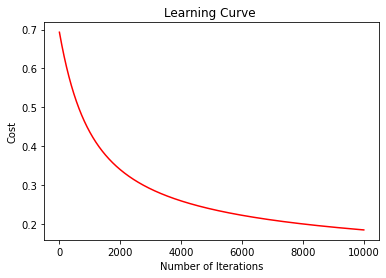

[Text(33.0, 0.5, 'False Values'), Text(0.5, 15.0, 'True Values')]

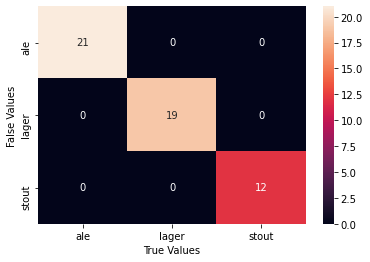

In [10]:
"""
Description : Executing the logistic algorithm built from scratch and plotting the convergence of cost and confusion matrix

"""
d = model(num_iterations = 10000, learning_rate = 0.001)
plt.plot(range(len(d["costs"])),d["costs"],'r')
plt.title("Learning Curve ")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

#Confusion matrix for the last iteration of Logistic Regression model
conf_matrix = confusion_matrix(d["Y_test"],d["Y_test_predictions"])
matrix = sns.heatmap(conf_matrix, annot = True, xticklabels = classes, yticklabels = classes)
matrix.set(xlabel = "True Values", ylabel = "False Values")

### Comparing different learning rates 

learning rate is: 0.5

Average Test Accuracy for Implemented Logistic Regression:  97.11538461538461 %

-------------------------------------------------------

learning rate is: 0.1

Average Test Accuracy for Implemented Logistic Regression:  97.3076923076923 %

-------------------------------------------------------

learning rate is: 0.01

Average Test Accuracy for Implemented Logistic Regression:  95.19230769230771 %

-------------------------------------------------------

learning rate is: 0.001

Average Test Accuracy for Implemented Logistic Regression:  95.96153846153847 %

-------------------------------------------------------



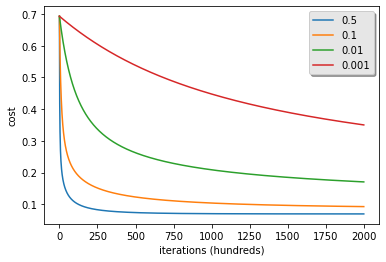

In [11]:
"""
Description : Comparing the learning curve of our model with several choices of learning rates

"""
learning_rates = [0.5,0.1,0.01, 0.001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model( num_iterations = 2000, learning_rate = i, print_accuracy = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### Sci-kit Learn Logistic Regression Implementation

In [13]:
"""
Description : Implementation of Logistic Regression using  scikit-learn

"""
sci_learn_accuracy = np.zeros((10))
X_data = preprocessing.scale(X_data)
logistic_reg_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
kfold_result = cross_val_score(logistic_reg_model, X_data, Y_data, cv=10, scoring='accuracy')
sci_learn_accuracy = kfold_result*100

#Printing the accuracies of each iteration
for j in range(10):
    print("Accuracy for ", j+1, " iteration: ", sci_learn_accuracy[j])
print("\nAverage Scikit-Learn Logistic Regression accuracy for test data: ", sci_learn_accuracy.mean(), '%')

Accuracy for  1  iteration:  93.75
Accuracy for  2  iteration:  100.0
Accuracy for  3  iteration:  100.0
Accuracy for  4  iteration:  100.0
Accuracy for  5  iteration:  100.0
Accuracy for  6  iteration:  93.33333333333333
Accuracy for  7  iteration:  93.33333333333333
Accuracy for  8  iteration:  100.0
Accuracy for  9  iteration:  86.66666666666667
Accuracy for  10  iteration:  93.33333333333333

Average Scikit-Learn Logistic Regression accuracy for test data:  96.04166666666666 %


### Plotting Accuracies for both the implementations 

<function matplotlib.pyplot.show(*args, **kw)>

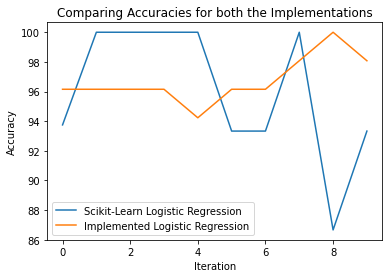

In [14]:
"""
Description : Plotting the accuracies for both the implementations

"""
plt.plot(range(10), sci_learn_accuracy, label = 'Scikit-Learn Logistic Regression')
plt.plot(range(10), d["logistic_reg_accuracy"], label = 'Implemented Logistic Regression')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.title('Comparing Accuracies for both the Implementations')
plt.legend()
plt.show 